In [48]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# load data
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# head data

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Categorical columns

cat_col = list(df.select_dtypes(include = 'O'))
print(f'Categorical Columns : {cat_cols}')

Categorical Columns : ['Surname', 'Geography', 'Gender']


In [18]:
# Numerical columns

num_cols = list(df.select_dtypes(exclude = 'O'))
print(f'Numerical Columns : {num_cols}')

Numerical Columns : ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


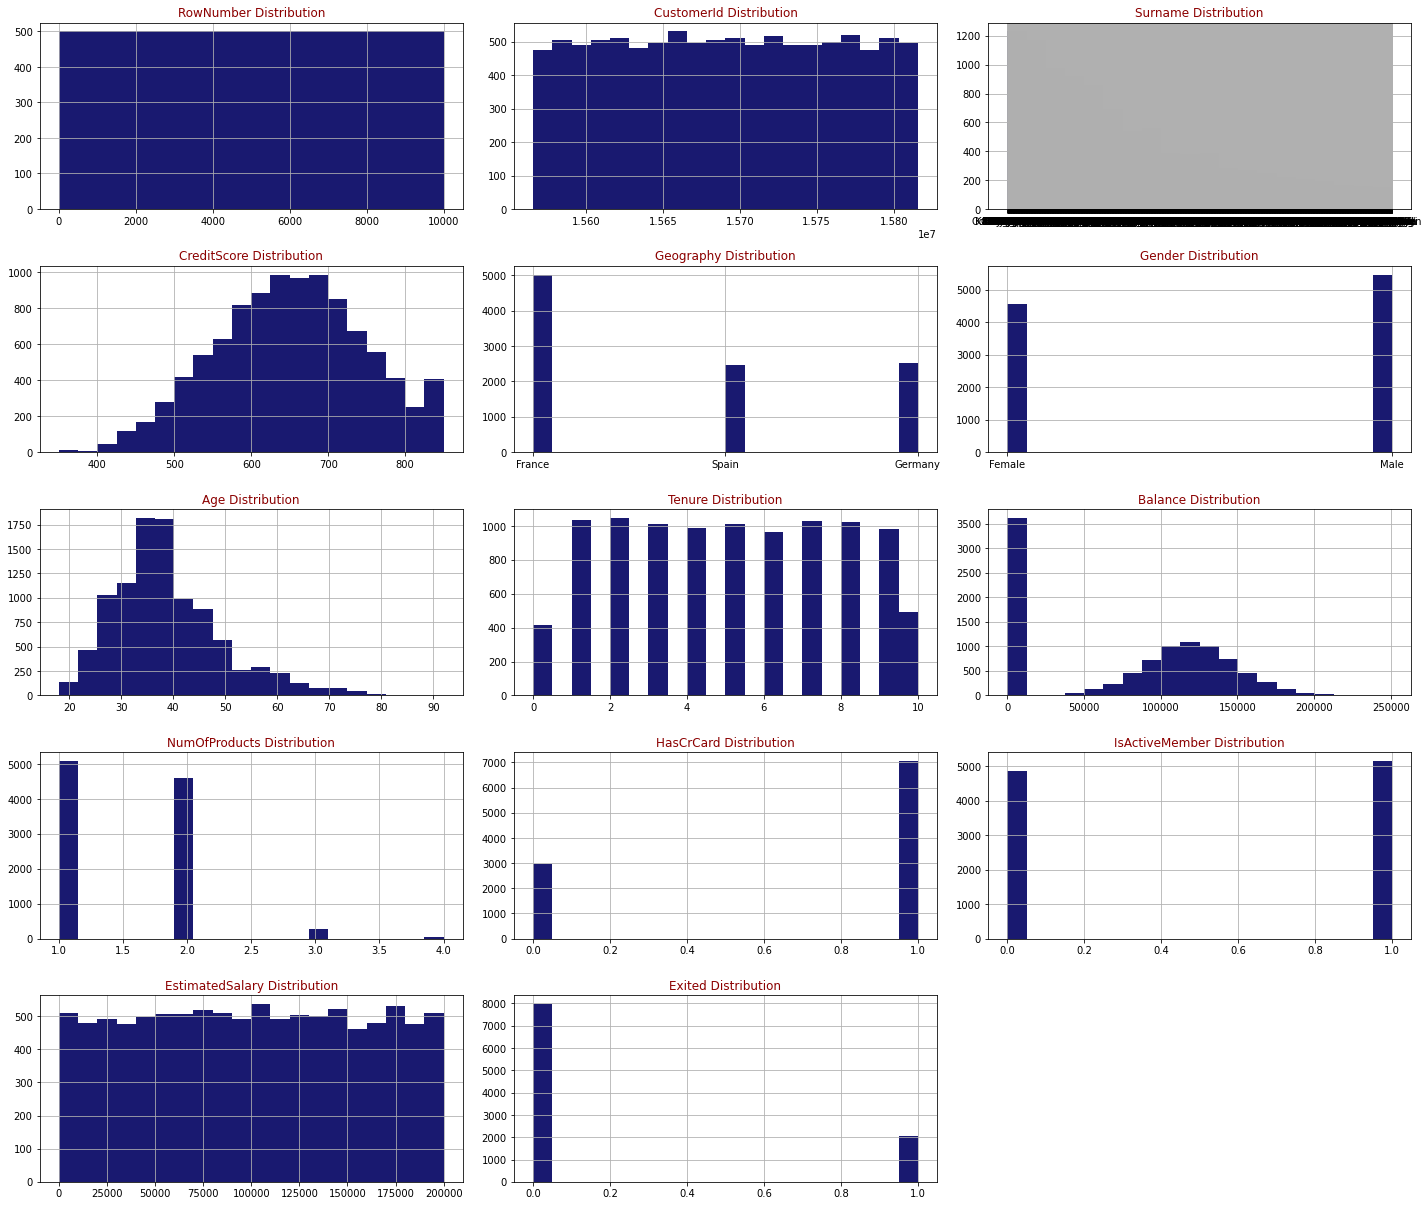

In [4]:
# Univariate analysis

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

<AxesSubplot:xlabel='Age', ylabel='Balance'>

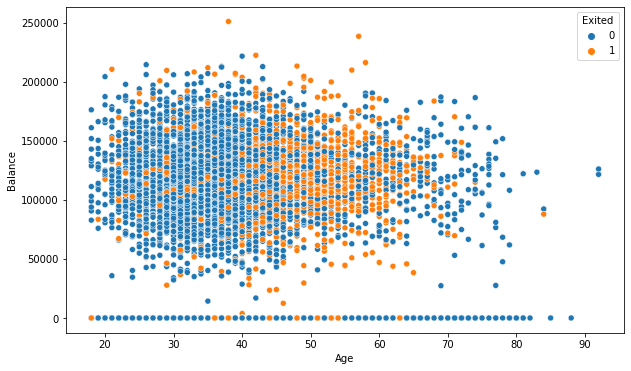

In [28]:
# bivariate analysis
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited", color = 'midnightblue')

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

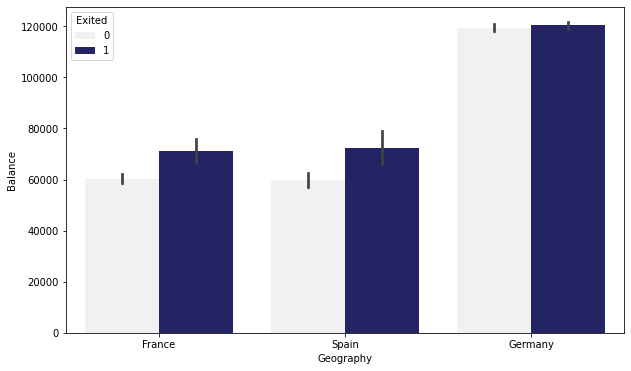

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Geography", y="Balance", hue="Exited", color = 'midnightblue')

<Figure size 720x432 with 0 Axes>

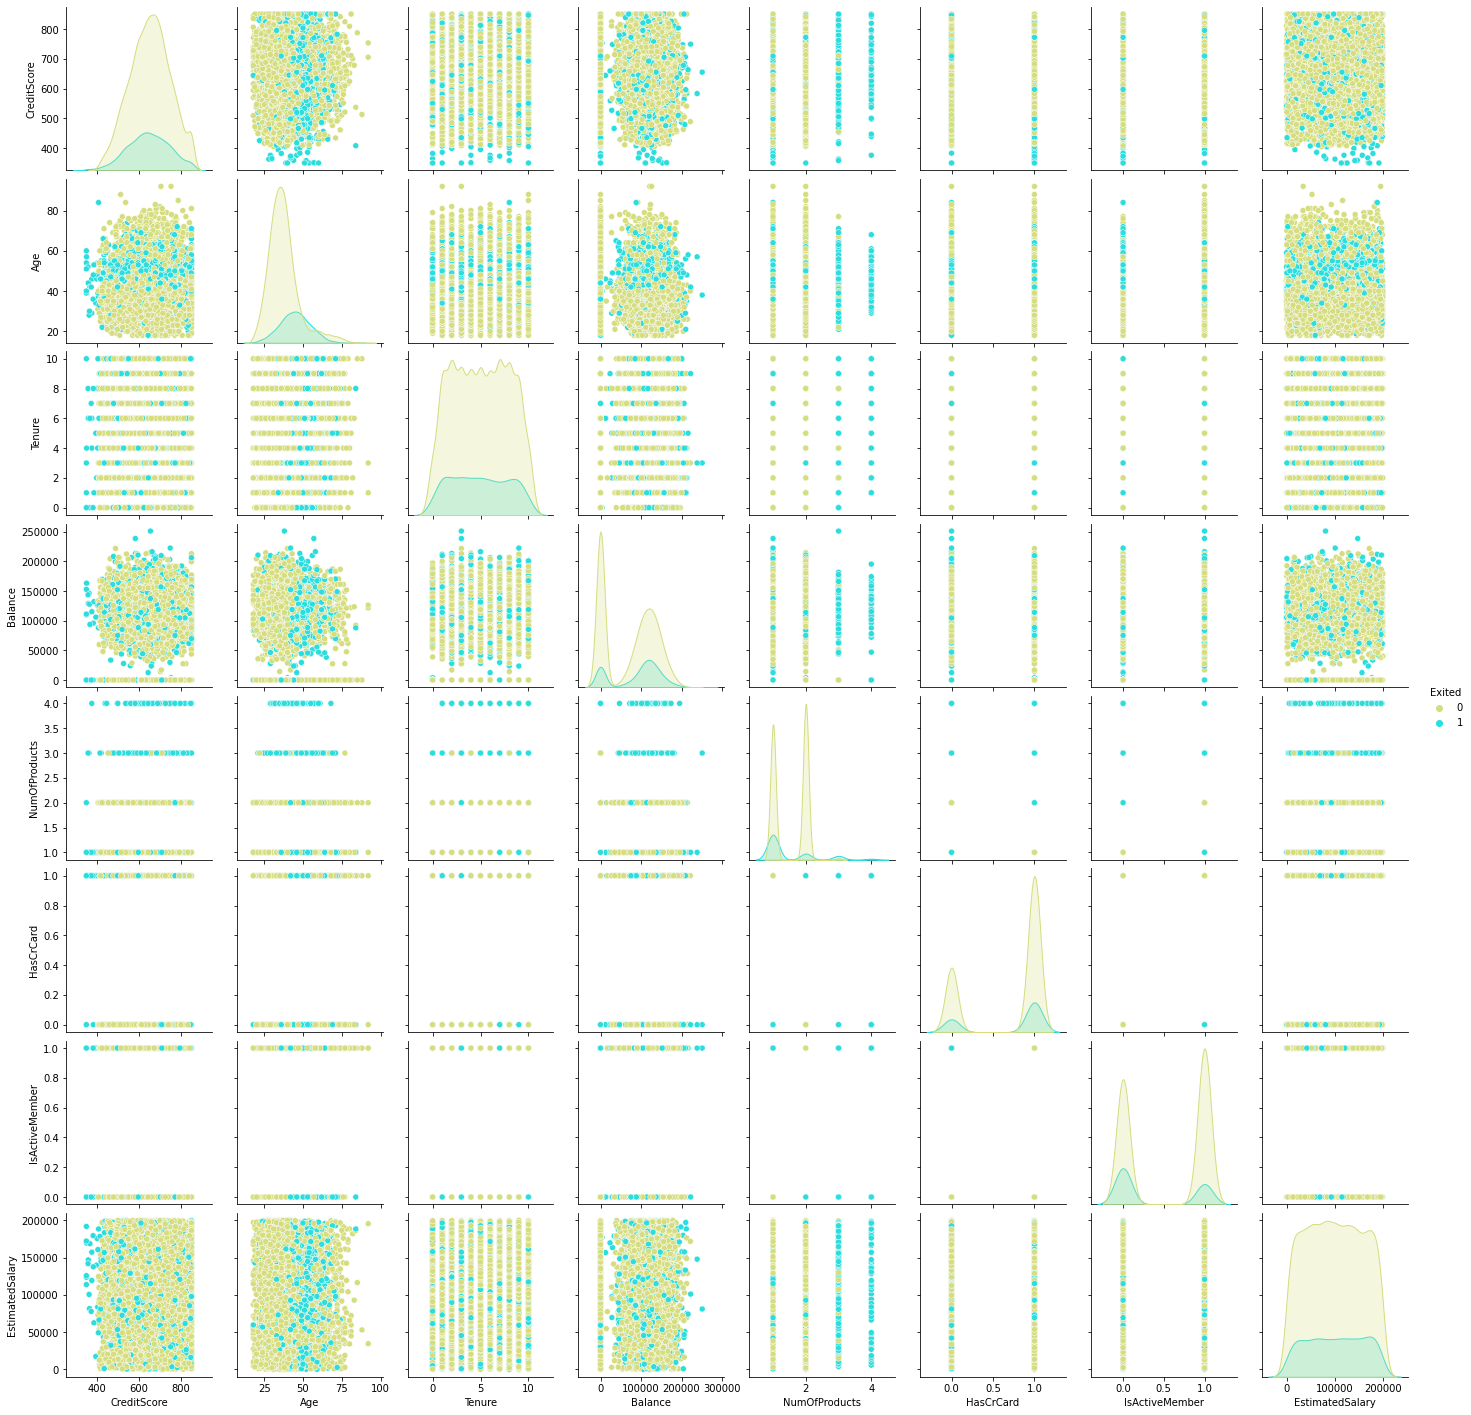

In [36]:
# Multivaraite Analysis

plt.figure(figsize=(10,6))
sns.pairplot(df.drop(['RowNumber','CustomerId','Surname'],axis=1),hue='Exited', palette = 'rainbow_r' )
plt.show()

In [ ]:
def draw_boxplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(df[feature], ax=ax, color='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_barplot(df,df.columns,6,3)

In [6]:
# Descriptive statistics 

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.describe(include = "all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Categorical Columns : ['Surname', 'Geography', 'Gender']


Numerical Columns : ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [14]:
# check for missing values in columns

missing = [miss for miss in df.columns if df[miss].isnull().sum() > 0]
print(f'Missing columns : {missing}')

Missing columns : []


In [15]:
# percent of missing values in missing columns

for i in df.columns:
    percent = (df[i].isnull().sum() / len(df))*100
    print(f'{i} ---> {percent}')

RowNumber ---> 0.0
CustomerId ---> 0.0
Surname ---> 0.0
CreditScore ---> 0.0
Geography ---> 0.0
Gender ---> 0.0
Age ---> 0.0
Tenure ---> 0.0
Balance ---> 0.0
NumOfProducts ---> 0.0
HasCrCard ---> 0.0
IsActiveMember ---> 0.0
EstimatedSalary ---> 0.0
Exited ---> 0.0


<AxesSubplot:>

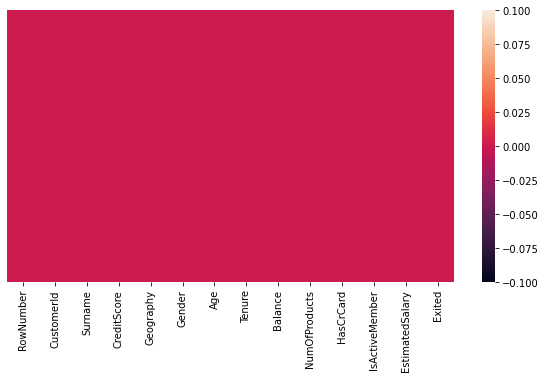

In [16]:
# Visualizing missing columns

plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), yticklabels = False)

In [38]:
# Treating outliers

#Finding the IQR
p25 = df['CreditScore'].quantile(0.25)
p75 = df['CreditScore'].quantile(0.75)
iqr=p75-p25

# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

df[df['CreditScore'] > upper_limit]
df[df['CreditScore'] < lower_limit]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [40]:
#Trimming the outlier
df1 = df[df['CreditScore'] < upper_limit]
df1.shape

(10000, 14)

In [41]:
# performing encoding for categorical variables

for i in df1.columns:
    if df1[i].dtype == 'O':
        df1 = pd.get_dummies(df1, columns = [i], drop_first = True)

In [42]:
# After performing encoding

df1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# Splitting data into dependent and independent variables

x = df1.drop('Exited', axis = 1)
y = df1.Exited

In [45]:
# scalling dependent and independent variables

df_scaled = x.copy()
col_names = ['RowNumber', 'CustomerId', 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']
features = df_scaled[col_names]

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)

In [49]:
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,...,0,0,0,0,0,0,0,0,0,0
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,...,0,0,0,0,0,0,0,0,1,0
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,...,0,0,0,0,0,0,0,0,0,0
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,...,0,0,0,0,0,0,0,0,0,0
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,...,0,0,0,0,0,0,0,0,1,0


In [58]:
# Spliting data into train and test
X = df1.drop(['RowNumber','CustomerId','Exited'], axis=1)
y= df1[['Exited']]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [60]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [70]:
print('Training score',model.score(X_train, y_train))
print('Testing Score',model.score(X_test, y_test))

Training score 0.7938571428571428
Testing Score 0.7863333333333333
